<a href="https://colab.research.google.com/github/Matsalak-Viktoria/Team_3/blob/Chatbot/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyagrum

In [ ]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import os

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import math

In [ ]:
bn=gum.BayesNet('PsyMonitor')

In [ ]:
p = bn.add(gum.LabelizedVariable('p', 'Personality', 5))

In [ ]:
!pip install azure-ai-language-conversations

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Items.csv to Items.csv


In [ ]:
import csv
from azure.core.credentials import AzureKeyCredential
from azure.ai.language.conversations import ConversationAnalysisClient

clu_endpoint = "https://psymonitor.cognitiveservices.azure.com/"
clu_key = "fb821673335b408f9b324740f5c3291a"
project_name = "PsyMonitor"
deployment_name = "PsyMonitor"


def personalityFeedbackAnalyse(query):
    client = ConversationAnalysisClient(clu_endpoint, AzureKeyCredential(clu_key))
    with client:
        return client.analyze_conversation(
            task={
                "kind": "Conversation",
                "analysisInput": {
                    "conversationItem": {
                        "participantId": "1",
                        "id": "1",
                        "modality": "text",
                        "language": "it",
                        "text": query
                    },
                    "isLoggingEnabled": False
                },
                "parameters": {
                    "projectName": project_name,
                    "deploymentName": deployment_name,
                    "verbose": True
                }
            }
        )

count = 0

# Total sum of scores
sum_s_t = 0

# Sum of scores for Factor 1
sum_s_1 = 0

# Sum of scores for Factor 2
sum_s_2 = 0

# Sum of scores for Factor 3
sum_s_3 = 0

# Sum of scores for Factor 4
sum_s_4 = 0

# Sum of scores for Factor 5
sum_s_5 = 0



# Items from csv file
with open("Items.csv", "r") as file:
    for i, row in enumerate(csv.reader(file)):
        print(row[0])
        print("- Very Inaccurate \n- Moderately Inaccurate\n- Neither Accurate Nor Inaccurate"
              " \n- Moderately Accurate \n- Very Accurate")
        answer = input("Enter your answer: ")
        result = personalityFeedbackAnalyse(answer)
        if (i % 2 == 0 and i != 28 and i != 38 and i != 48) or i == 39 or i == 41 or i == 47 or i == 49:
            if result["result"]["prediction"]["topIntent"] == "StrongDisagree":
                answer = 1
            elif result["result"]["prediction"]["topIntent"] == "Disagree":
                answer = 2
            elif result["result"]["prediction"]["topIntent"] == "NeitherAgree":
                answer = 3
            elif result["result"]["prediction"]["topIntent"] == "Agree":
                answer = 4
            else:
                answer = 5
        else:
            if result["result"]["prediction"]["topIntent"] == "StrongDisagree":
                answer = 5
            elif result["result"]["prediction"]["topIntent"] == "Disagree":
                answer = 4
            elif result["result"]["prediction"]["topIntent"] == "NeitherAgree":
                answer = 3
            elif result["result"]["prediction"]["topIntent"] == "Agree":
                answer = 2
            else:
                answer = 1

        if count == 0:
            sum_s_1 += answer
            count += 1
        elif count == 1:
            sum_s_2 += answer
            count += 1
        elif count == 2:
            sum_s_3 += answer
            count += 1
        elif count == 3:
            sum_s_4 += answer
            count += 1
        else:
            sum_s_5 += answer
            count = 0

        sum_s_t += answer
        print()

val_1 = sum_s_1 / sum_s_t
val_2 = sum_s_2 / sum_s_t
val_3 = sum_s_3 / sum_s_t
val_4 = sum_s_4 / sum_s_t
val_5 = sum_s_5 / sum_s_t

print("Sum of scores for Factor 1:", sum_s_1)
print("Sum of scores for Factor 2:", sum_s_2)
print("Sum of scores for Factor 3:", sum_s_3)
print("Sum of scores for Factor 4:", sum_s_4)
print("Sum of scores for Factor 5:", sum_s_5)
print("Total sum of scores:", sum_s_t)
print("Value 1: {0:.2f}".format(val_1))
print("Value 2: {0:.2f}".format(val_2))
print("Value 3: {0:.2f}".format(val_3))
print("Value 4: {0:.2f}".format(val_4))
print("Value 5: {0:.2f}".format(val_5))

1. Am the life of the party.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

2. Feel little concern for others.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

3. Am always prepared.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

4. Get stressed out easily.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

5. Have a rich vocabulary.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

6. Don't talk a lot.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor I

In [ ]:
bn.cpt('p').fillWith([val_1,val_2,val_3,val_4,val_5])
bn.cpt('p').normalizeAsCPT()


(pyAgrum.Potential<double>@0x592a1771e8a0) 
  p                                              |
0        |1        |2        |3        |4        |
---------|---------|---------|---------|---------|
 0.2055  | 0.1781  | 0.1781  | 0.2877  | 0.1507  |

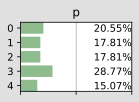

In [ ]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior("p"))

In [ ]:
var = gum.DiscretizedVariable('Topic1', 'Potresti raccontarmi le difficoltà che riscontri quando studi?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic1 = bn.add(var)

var = gum.DiscretizedVariable('Topic2', 'Potresti raccontarmi perché hai difficoltà a stringere amicizie?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic2 =bn.add(var)

var = gum.DiscretizedVariable('Topic3', 'Potresti descrivermi nel dettaglio il tuo rapporto con i tuoi genitori?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic3 =bn.add(var)



In [ ]:
bn.addArc(p,Topic1)
bn.addArc(p,Topic2)
bn.addArc(p,Topic3)

In [ ]:
bn.cpt('Topic1').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x592a17850300) 
      ||  Topic1                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0113  | 0.0053  | 0.0393  |
1     || 0.0023  | 0.1238  | 0.1520  |
2     || 0.0094  | 0.0190  | 0.0657  |
3     || 0.1433  | 0.1177  | 0.0633  |
4     || 0.0136  | 0.1441  | 0.0899  |

In [ ]:
bn.cpt('Topic2').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x592a17c3fe50) 
      ||  Topic2                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0359  | 0.0580  | 0.0183  |
1     || 0.1060  | 0.0928  | 0.0814  |
2     || 0.0624  | 0.0739  | 0.1072  |
3     || 0.0395  | 0.0862  | 0.0060  |
4     || 0.0469  | 0.0761  | 0.1095  |

In [ ]:
bn.cpt('Topic3').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x592a168fced0) 
      ||  Topic3                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0468  | 0.0361  | 0.0695  |
1     || 0.0939  | 0.0202  | 0.1083  |
2     || 0.0421  | 0.1080  | 0.0172  |
3     || 0.0732  | 0.0715  | 0.1107  |
4     || 0.0554  | 0.0527  | 0.0946  |

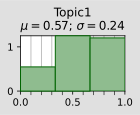

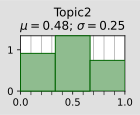

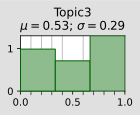

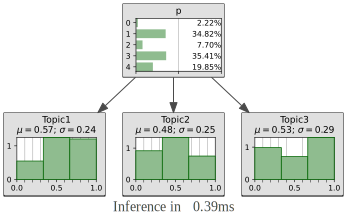

In [ ]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior("Topic1"))
gnb.showProba(ie.posterior("Topic2"))
gnb.showProba(ie.posterior("Topic3"))
gnb.showInference(bn)


In [ ]:
print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

Entropy of Topic1 is 1.5025740551341036
Entropy of Topic2 is 1.5408193678001145
Entropy of Topic3 is 1.5428092818755434


In [ ]:
pip install neo4j

In [ ]:
from neo4j import GraphDatabase

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j+s://85b0c276.databases.neo4j.io:7687"
AUTH = ("neo4j", "HoO3Xi8_f1rELFPWaiGAH_UswDErhK2K_t6QeyolOG4")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

In [ ]:
!pip install azure-ai-textanalytics==5.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.9 MB/s eta 0:00:00



Potresti descrivermi nel dettaglio il tuo rapporto con i tuoi genitori?

Negative: 0.88
Neutral: 0.11
Positive: 0.01

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 1.5025740551341036
Entropy of Topic2 is 1.5408193678001145
Entropy of Topic3 is 1.5428092818755434

Negative, neutral, positive values before establishing the evidence:
Negative: 0.88
Neutral: 0.11
Positive: 0.01

BN before establishing the evidence



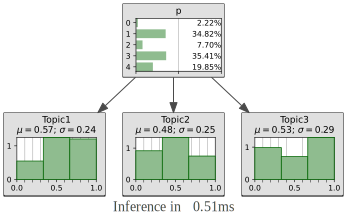


Personality node before establishing the evidence



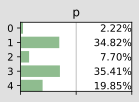


0.02219210401583547
0.34824367300164794
0.07698219733009246
0.3541203063691154
0.19846171928330858

Node Topic1 before establishing the evidence



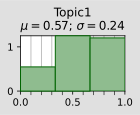


0.1823094638686214
0.4167372297525018
0.4009533063788769

Node Topic2 before establishing the evidence



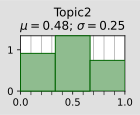


0.30472449261463347
0.44687796228787946
0.248397545097487

Node Topic3 before establishing the evidence



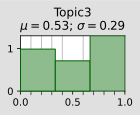


0.3289927145376017
0.23729007988886358
0.43371720557353466

Dictionary before establishing the evidence
{}


Dictionary after establishing the evidence
{'p': array([0.00154996, 0.49024734, 0.01819244, 0.37709832, 0.11291194]), 'Topic3': array([0.91672844, 0.06939442, 0.01387714])}


Personality node after establishing the evidence



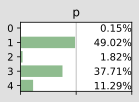


0.0015499605861822158
0.49024733799442183
0.018192438217806074
0.3770983207167648
0.11291194248482521

Node Topic1 after establishing the evidence



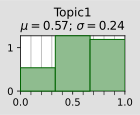


0.17888110717176117
0.42470415885302226
0.3964147339752166

Node Topic2 after establishing the evidence



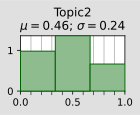


0.3263979330172054
0.4524162938150009
0.2211857731677936

Node Topic3 after establishing the evidence



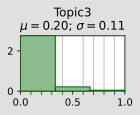


0.9167284359480193
0.06939442164803716
0.01387714240394351

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 1.4980389001080874
Entropy of Topic2 is 1.526367311497804
Entropy of Topic3 is 0.46772814072726965

BN after establishing the evidence



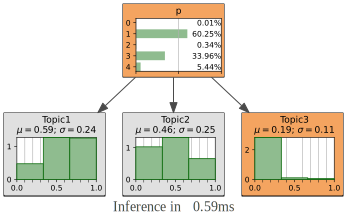


Potresti raccontarmi perché hai difficoltà a stringere amicizie?

Negative: 0.96
Neutral: 0.03
Positive: 0.01

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 1.4980389001080874
Entropy of Topic2 is 1.526367311497804
Entropy of Topic3 is 0.46772814072726965

Negative, neutral, positive values before establishing the evidence:
Negative: 0.96
Neutral: 0.03
Positive: 0.01

BN before establishing the evidence



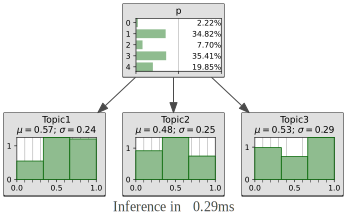


Personality node before establishing the evidence



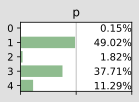


0.0015499605861822158
0.49024733799442183
0.018192438217806074
0.3770983207167648
0.11291194248482521

Node Topic1 before establishing the evidence



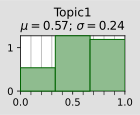


0.17888110717176117
0.42470415885302226
0.3964147339752166

Node Topic2 before establishing the evidence



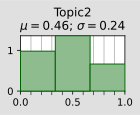


0.3263979330172054
0.4524162938150009
0.2211857731677936

Node Topic3 before establishing the evidence



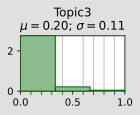


0.9167284359480193
0.06939442164803716
0.01387714240394351

Dictionary before establishing the evidence
{'p': array([0.00154996, 0.49024734, 0.01819244, 0.37709832, 0.11291194]), 'Topic3': array([0.91672844, 0.06939442, 0.01387714])}


Dictionary after establishing the evidence
{'p': array([8.70946712e-05, 6.59744551e-01, 2.58471987e-03, 3.04575855e-01,
       3.30077798e-02]), 'Topic3': array([0.91672844, 0.06939442, 0.01387714]), 'Topic2': array([0.95514653, 0.03850846, 0.00634501])}


Personality node after establishing the evidence



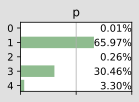


8.709467118739626e-05
0.6597445507948243
0.002584719872200322
0.304575854861423
0.03300777980036501

Node Topic1 after establishing the evidence



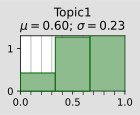


0.14197911996026322
0.4240698652110204
0.43395101482871645

Node Topic2 after establishing the evidence



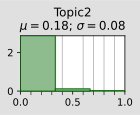


0.9551465301218025
0.03850845685418659
0.006345013024010952

Node Topic3 after establishing the evidence



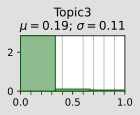


0.9482043171289989
0.03350277955478209
0.018292903316218943

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 1.4473373666571465
Entropy of Topic2 is 0.290495017085873
Entropy of Topic3 is 0.34250234176901473

BN after establishing the evidence



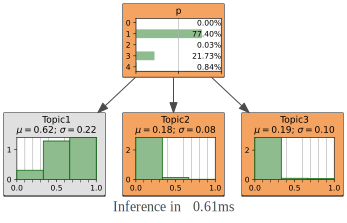


Potresti raccontarmi le difficoltà che riscontri quando studi?

Negative: 0.8
Neutral: 0.17
Positive: 0.02

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 1.4473373666571465
Entropy of Topic2 is 0.290495017085873
Entropy of Topic3 is 0.34250234176901473

Negative, neutral, positive values before establishing the evidence:
Negative: 0.8
Neutral: 0.17
Positive: 0.02

BN before establishing the evidence



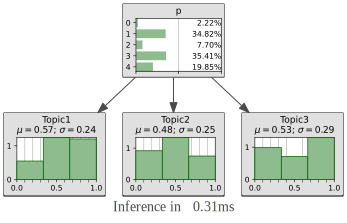


Personality node before establishing the evidence



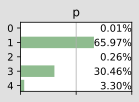


8.709467118739626e-05
0.6597445507948243
0.002584719872200322
0.304575854861423
0.03300777980036501

Node Topic1 before establishing the evidence



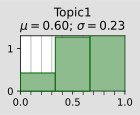


0.14197911996026322
0.4240698652110204
0.43395101482871645

Node Topic2 before establishing the evidence



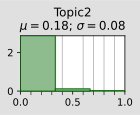


0.9551465301218025
0.03850845685418659
0.006345013024010952

Node Topic3 before establishing the evidence



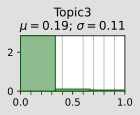


0.9482043171289989
0.03350277955478209
0.018292903316218943

Dictionary before establishing the evidence
{'p': array([8.70946712e-05, 6.59744551e-01, 2.58471987e-03, 3.04575855e-01,
       3.30077798e-02]), 'Topic3': array([0.91672844, 0.06939442, 0.01387714]), 'Topic2': array([0.95514653, 0.03850846, 0.00634501])}


Dictionary after establishing the evidence
{'p': array([5.02625883e-06, 4.38346288e-01, 2.48785248e-04, 5.53714297e-01,
       7.68560323e-03]), 'Topic3': array([0.91672844, 0.06939442, 0.01387714]), 'Topic2': array([0.95514653, 0.03850846, 0.00634501]), 'Topic1': array([0.49991506, 0.44305694, 0.05702799])}


Personality node after establishing the evidence



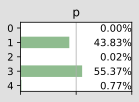


5.026258827624136e-06
0.43834628781540647
0.0002487852484607565
0.5537142974457465
0.007685603231558684

Node Topic1 after establishing the evidence



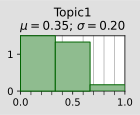


0.4999150629969582
0.4430569441383036
0.057027992864738225

Node Topic2 after establishing the evidence



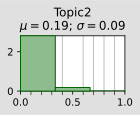


0.9371256925308634
0.06009455885983286
0.0027797486093038087

Node Topic3 after establishing the evidence



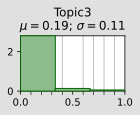


0.9360970548558163
0.04476086052889752
0.01914208461528618

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 1.2560298686408007
Entropy of Topic2 is 0.3551783899649932
Entropy of Topic3 is 0.3990289917637737

BN after establishing the evidence



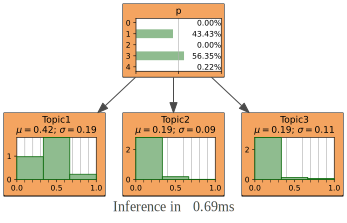


Potresti raccontarmi le difficoltà che riscontri quando studi?



In [ ]:
def create_a_node(tx, user_answer):
    tx.run("CREATE (n:Utterance {text: $user_answer})", user_answer = user_answer)


def rec_interactions(tx, user_answer):
    tx.run(
        "MATCH (n:Utterance) WHERE NOT EXISTS ((n)-[:FOLLOWED_BY]->(:Utterance)) WITH n "
        "CREATE (n2:Utterance {text: $user_answer}) "
        "CREATE (n)-[:FOLLOWED_BY]->(n2)", user_answer = user_answer)

language_key = "fb821673335b408f9b324740f5c3291a"
language_endpoint = "https://psymonitor.cognitiveservices.azure.com/"

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential


def analyseSentiment(text):
    ta_credential = AzureKeyCredential(language_key)
    text_analytics_client = TextAnalyticsClient(
        endpoint=language_endpoint,
        credential=ta_credential)
    return text_analytics_client.analyze_sentiment([text], show_opinion_mining=True)[0]


def maxEntropy(dictionary):
    max_elem_name = max(dictionary.items(), key=lambda x: x[1])[0]
    return max_elem_name

negative = 0
neutral = 0
positive = 0

personality = zeros(5)

personality[0] = val_1
personality[1] = val_2
personality[2] = val_3
personality[3] = val_4
personality[4] = val_5

list_of_evi = {}

def setEvidence(max_elem_name, neg, neu, pos, f_1, f_2, f_3, f_4, f_5):
    global topic_sen_dis
    topic_sen_dis = zeros(3)
    topic_sen_dis[0] = neg
    topic_sen_dis[1] = neu
    topic_sen_dis[2] = pos
    personality[0] = f_1
    personality[1] = f_2
    personality[2] = f_3
    personality[3] = f_4
    personality[4] = f_5
    list_of_evi['p'] = personality
    list_of_evi[max_elem_name] = topic_sen_dis
    ie.setEvidence(list_of_evi)

#ie.setEvidence({'p': personality})
node_count = 0

while True:
    d = {'Topic1': ie.posterior('Topic1').entropy(), 'Topic2': ie.posterior('Topic2').entropy(), 'Topic3': ie.posterior('Topic3').entropy()}
    max_ent_elem = maxEntropy(d)

    print()
    print(bn.variableFromName(max_ent_elem).description())

    print()
    answer = input("Enter your answer: ")
    result = analyseSentiment(answer)

    if node_count == 0:
      with driver.session(database="neo4j") as session:
        session.execute_write(create_a_node, answer)
      node_count += 1
    else:
      with driver.session(database="neo4j") as session:
        session.execute_write(rec_interactions, answer)

    # result = analyseSentiment("Non mi piace il corso di programmazione. Il prof mi odia.")
    negative = result.confidence_scores.negative
    neutral = result.confidence_scores.neutral
    positive = result.confidence_scores.positive
    print("Negative: {}".format(result.confidence_scores.negative))
    print("Neutral: {}".format(result.confidence_scores.neutral))
    print("Positive: {}".format(result.confidence_scores.positive))
    for mined_opinion in result.sentences[0].mined_opinions:
        target = mined_opinion.target
        print("'{}' target '{}'".format(target.sentiment, target.text))
        print("Target score:\nPositive={0:.2f}\nNegative={1:.2f}\n".format(
            target.confidence_scores.positive,
            target.confidence_scores.negative,
        ))
        for assessment in mined_opinion.assessments:
            print("'{}' assessment '{}'".format(assessment.sentiment, assessment.text))
            print("Assessment score:\nPositive={0:.2f}\nNegative={1:.2f}\n".format(
                assessment.confidence_scores.positive,
                assessment.confidence_scores.negative,
            ))

    print()
    print('Entropy of Topics before establishing the evidence:')
    print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
    print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
    print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

    print()
    print("Negative, neutral, positive values before establishing the evidence:")
    print("Negative:", negative)
    print("Neutral:", neutral)
    print("Positive:", positive)

    print()
    print("BN before establishing the evidence")
    print()
    ie.makeInference()
    gnb.showInference(bn)

    print()
    print("Personality node before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("p"))
    print()
    print(ie.posterior('p')[0])
    print(ie.posterior('p')[1])
    print(ie.posterior('p')[2])
    print(ie.posterior('p')[3])
    print(ie.posterior('p')[4])

    print()
    print("Node Topic1 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic1"))
    print()
    print(ie.posterior('Topic1')[0])
    print(ie.posterior('Topic1')[1])
    print(ie.posterior('Topic1')[2])

    print()
    print("Node Topic2 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic2"))
    print()
    print(ie.posterior('Topic2')[0])
    print(ie.posterior('Topic2')[1])
    print(ie.posterior('Topic2')[2])

    print()
    print("Node Topic3 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic3"))
    print()
    print(ie.posterior('Topic3')[0])
    print(ie.posterior('Topic3')[1])
    print(ie.posterior('Topic3')[2])

    print()
    print("Dictionary before establishing the evidence")
    print(list_of_evi)
    print()

    val_1 = ie.posterior('p')[0]
    val_2 = ie.posterior('p')[1]
    val_3 = ie.posterior('p')[2]
    val_4 = ie.posterior('p')[3]
    val_5 = ie.posterior('p')[4]

    setEvidence(max_ent_elem, negative, neutral, positive, val_1, val_2, val_3, val_4, val_5)

    personality[0] = ie.posterior('p')[0]
    personality[1] = ie.posterior('p')[1]
    personality[2] = ie.posterior('p')[2]
    personality[3] = ie.posterior('p')[3]
    personality[4] = ie.posterior('p')[4]

    topic_sen_dis[0] = ie.posterior(max_ent_elem)[0]
    topic_sen_dis[1] = ie.posterior(max_ent_elem)[1]
    topic_sen_dis[2] = ie.posterior(max_ent_elem)[2]

    print()
    print("Dictionary after establishing the evidence")
    print(list_of_evi)
    print()

    print()
    print("Personality node after establishing the evidence")
    print()
    ie.makeInference()
    gnb.showProba(ie.posterior("p"))
    print()
    print(ie.posterior('p')[0])
    print(ie.posterior('p')[1])
    print(ie.posterior('p')[2])
    print(ie.posterior('p')[3])
    print(ie.posterior('p')[4])

    print()
    print("Node Topic1 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic1"))
    print()
    print(ie.posterior('Topic1')[0])
    print(ie.posterior('Topic1')[1])
    print(ie.posterior('Topic1')[2])

    print()
    print("Node Topic2 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic2"))
    print()
    print(ie.posterior('Topic2')[0])
    print(ie.posterior('Topic2')[1])
    print(ie.posterior('Topic2')[2])

    print()
    print("Node Topic3 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic3"))
    print()
    print(ie.posterior('Topic3')[0])
    print(ie.posterior('Topic3')[1])
    print(ie.posterior('Topic3')[2])

    print()
    print('Entropy of Topics after establishing the evidence:')
    print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
    print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
    print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

    print()
    print("BN after establishing the evidence")
    print()
    gnb.showInference(bn, evs = list_of_evi)